*Visualización de la información*

**Dante Bermúdez Marbán**

# Heatmap

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [111]:
class Figura:
    """Clase para la figura principal
    Atributos:
        fig (Figure de matplotlib): es la figura de ese men
        
        ax (Axes o Array de Axes): Objeto o arreglo de objetos donde se puede
        graficar
        
        graphics (objeto plot o array de objetos plots): Arreglo donde se almacenan los
        objetos que corresponden a las gráficas
        
        ndims (int): número de dimensiones que tiene ax y graphics.
        """
    def __init__(self,n,m=1,titulo="",pad=None,tamaño=(16,9)):
        """Crea una nueva figura
        Parámetros:
            n (int): número de renglones
            
            m (int): número de columnas, por defecto vale 1
            
            titulo (str): Título que tendrá la figura, por defecto no hay
            
            pad (3-tupla): Valores de espaciado (pad, width_pad, height_pad),
            por defecto vale (1.08, 1.08, 1.08)
            
            tamaño (2-tupla): Tamaño de la figura, por defecto vale (16,9)
        """    
        self.fig, self.ax = plt.subplots(n,m,figsize=tamaño)
        # inferir número de dimensiones
        if n == 1 and m == 1:
            self.ndims = 0
            self.graphics = 0
        elif n == 1 or m == 1:
            self.ndims = 1
            self.graphics = np.zeros(max(n,m),dtype="object")
        else:
            self.ndims = 2
            self.graphics = np.zeros((n,m),dtype="object")
            
        self.fig.suptitle(titulo,fontsize=18)
        
        if pad:
            self.fig.tight_layout(pad=pad[0], w_pad=pad[1], h_pad=pad[2])
        else:
            self.fig.tight_layout()

            
    def add_plot(self,pos,Clase,args):
        """Agrega un nuevo tipo de plot
        Parámetros:
            pos (tupla): la posición que corresponderá en la figura. 
            Será una 1-tupla si ax (y por lo tanto, graphics) es un vector o 
            una 2-tupla si es una matriz. Es decir, la longitud de la tupla es ndims
        
            Clase (?): Clase del plot que se quiere crear (no objeto creado a partir de la clase)
        
            args (dict): diccionario con los argumentos necesarios para crear un nuevo objeto
            de Clase
        
        Retorna: el mismo objeto Figura"""
        self.graphics[pos] = Clase(self.ax[pos],**args)
        return self
    
    def add_plots(self,clases,n_args):
        """Agrega los plots a la figura
        Parámetors:
            clases (list-like): arreglo donde estén las clases de los plots que se desean
            
            n_args (list): lista de diccionarios que correspondan a los argumentos necesarios
            para crear los objetos de cada uno de los elementos de clase.
        
        Retorna: el mismo objeto Figura.
        """
        for index, clase, args in zip(np.ndindex(self.graphics.shape),clases,n_args):
            self.add_plot(index,clase,args)
        return self
        
    def set_plot_options(self,pos,args):
        """Modificar opciones de un plot
        Parámetros:
            pos (tupla): la posición del plot en la figura. 
            Será una 1-tupla si ax (y por lo tanto, graphics) es un vector o 
            una 2-tupla si es una matriz. Es decir, la longitud de la tupla es ndims
            
            args (dict): diccionario que tiene como llaves y valores las opciones que
            se pueden modificar del plot."""
        self.graphics[pos].set_options(**args)
        return self
    
    def set_plots_options(self,n_args):
        """Modifica las opciones de todos los plots
        Parámetros:
            n_args (list): lista con diccionarios, los cuales serán pasados a las opciones
            del plot
            
        Retorna el mismo objeto Figura"""
        for index,args in zip(np.ndindex(self.graphics.shape),n_args):
            self.graphics[index].set_options(**args)
        return self
        
    def show(self):
        """Muestra la figura"""
        for _,graphic in np.ndenumerate(self.graphics):
            graphic.draw()

In [116]:
class Heatmap:
    """Clase para un heatmap
    Atributos:
        ax (Axes): Ejes donde se desea hacer el heatmap
        
        m (matrix): matriz que se quiere visualizar
        
        values_shown (bool): opción de mostrar los valores de la matriz
        cm (str): mapa de color que se desea usar
        """
    
    def __init__(self,ax,matrix):
        """Crea un nuevo heatmap
        Parámetros:
            ax (Axes): Ejes donde se desea hacer el heatmap
            m (Matrix): Matriz que se quiere visualizar
            """
        self.m = matrix
        self.ax = ax
        
        #Valores default
        self.values_shown = False
        self.cm = "seismic"
        
    
    def set_options(self,title=None,values_shown=False,xlabels=None,ylabels=None,cm="seismic"):
        """Establecer opciones de un heatmap
        Parámetros:
            titulo (str): título que se le desea dar al heatmap. Por defecto no tiene
            
            values_shown (bool): opción de mostrar los valores de la matriz. Por defecto
            no se muestran (False)
            
            xlabels (array): valores que se mostraran en el eje x. Por defecto no tiene
            
            ylabels (array): valores que se mostrarán en el ejey. Por defecto no tiene
            
            cm (str): mapa de color
        
        Retorna: el mismo objeto Heatmap"""
        if title != None:
            self.ax.set_title(title,)
        
        nrows,ncols = self.m.shape
        
        if xlabels:
            self.ax.set_xticks(np.arange(ncols))
            #rotamos los ejes para que se puedan ver
            self.ax.set_xticklabels(xlabels, weight="bold",
                                    rotation=45, ha="right", rotation_mode="anchor")
            
        if ylabels:
            self.ax.set_yticks(np.arange(nrows))
            self.ax.set_yticklabels(ylabels,weight="bold")
            
        if (not xlabels) and (not ylabels):
            self.ax.set_axis_off()
        
        self.values_shown = values_shown
        
        if cm:
            self.cm = cm
        
        return self
            
    def draw(self):
        """Dibuja el heatmap"""
        self.ax.imshow(self.m, cmap=self.cm) # hacemos heatmap
        if self.values_shown:
            # Colocamos los valores de la matriz
            for (i, j), v in np.ndenumerate(self.m):
                self.ax.text(j, i, f"{v:0.1f}", ha='center', va='center',
                        bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))



**Muestra de funcionamiento**

In [113]:
M = np.arange(0,25).reshape(5,5)
Mi = np.flip(M.ravel()).reshape(5,5)

creeper = np.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,100,100,0,0,100,100,0],
                    [0,100,100,0,0,100,100,0],
                    [0,0,0,100,100,0,0,0],
                    [0,0,100,100,100,100,0,0],
                    [0,0,100,100,100,100,0,0],
                    [0,0,100,0,0,100,0,0]])

r = np.random.random((5,5))

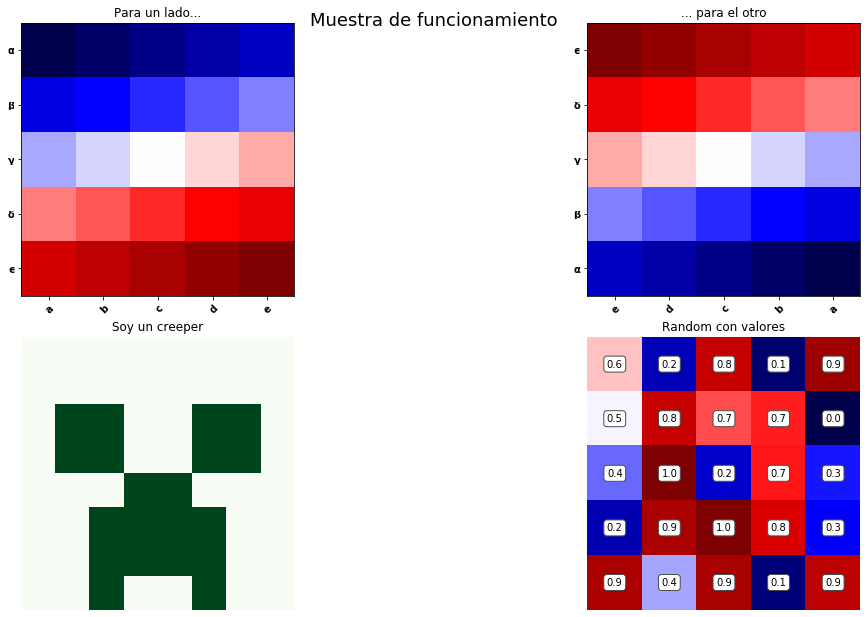

In [121]:
clases = [Heatmap for i in range(4)]
args = [{"matrix":m} for m in (M,Mi,creeper,r)]
ops_args = [{"title":"Para un lado...","xlabels":"a b c d e".split(), "ylabels":"α β γ δ ϵ".split()},
            {"title":"... para el otro","xlabels":"e d c b a".split(), "ylabels":"ϵ δ γ β α".split()},
            {"title":"Soy un creeper","cm":"Greens"}, {"title":"Random con valores","values_shown":True}]

Figura(2,2,titulo="Muestra de funcionamiento",pad=(2,2,2)).add_plots(clases,args).set_plots_options(ops_args).show()

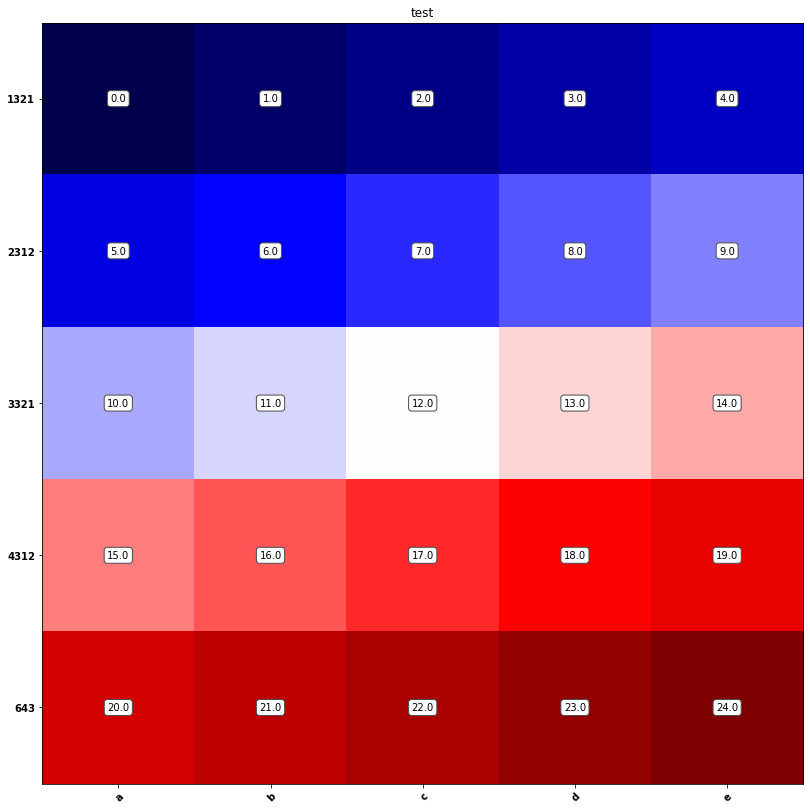

In [29]:
fig, axes = plt.subplots(1,figsize=(14,14))

hm = Heatmap(axes,M).set_options("test",values_shown=False,
                                    xlabels=['a','b','c','d','e'], ylabels=[1321,2312,3321,4312,643]).draw()